# TP3 - Timer log

In [8]:
filename = "shakespear_artwork.txt"

### Count number of word with dict

In [9]:
def count_words_dict(filename):
    # On ouvre le fichier en lecture
    with open(filename, 'r') as file:
        # On crée un dictionnaire vide pour stocker les occurrences de chaque mot
        word_count = {}
        # On parcourt chaque ligne du fichier
        for line in file:
            # On sépare chaque ligne en mots
            words = line.split()
            # On parcourt chaque mot de la ligne
            for word in words:
                # Si le mot est déjà présent dans le dictionnaire, on incrémente sa valeur de 1
                if word in word_count:
                    word_count[word] += 1
                # Sinon, on l'ajoute au dictionnaire avec une valeur de 1
                else:
                    word_count[word] = 1
    # On retourne le dictionnaire
    return word_count

### Count number of word with Counter

In [10]:
from collections import Counter

def count_words_counter(filename):
    # On ouvre le fichier en lecture
    with open(filename, 'r') as file:
        # On lit le contenu du fichier et on le stocke dans une chaîne de caractères
        text = file.read()
        # On sépare la chaîne en mots
        words = text.split()
        # On utilise la classe Counter pour compter le nombre d'occurrences de chaque mot
        word_count = Counter(words)
    # On retourne le résultat sous forme de dictionnaire
    return dict(word_count)

### Check time

In [11]:
import timeit

# On mesure le temps d'exécution de la fonction count_words_dict
elapsed_time = timeit.timeit(lambda: count_words_dict(filename), number=1)
print(f'Temps d\'exécution de count_words_dict: {elapsed_time:.6f} secondes')

Temps d'exécution de count_words_dict: 1.092170 secondes


In [12]:
# On mesure le temps d'exécution de la fonction count_words_counter
elapsed_time = timeit.timeit(lambda: count_words_counter(filename), number=1)
print(f'Temps d\'exécution de count_words_counter: {elapsed_time:.6f} secondes')

Temps d'exécution de count_words_counter: 0.523124 secondes


In [13]:
def measure_execution_time(filename, times = 5):
    dict_times = []
    counter_times = []
    for i in range(times):
        dict_times.append(timeit.timeit(lambda: count_words_dict(filename), number=1))
        counter_times.append(timeit.timeit(lambda: count_words_counter(filename), number=1))
    return dict_times, counter_times

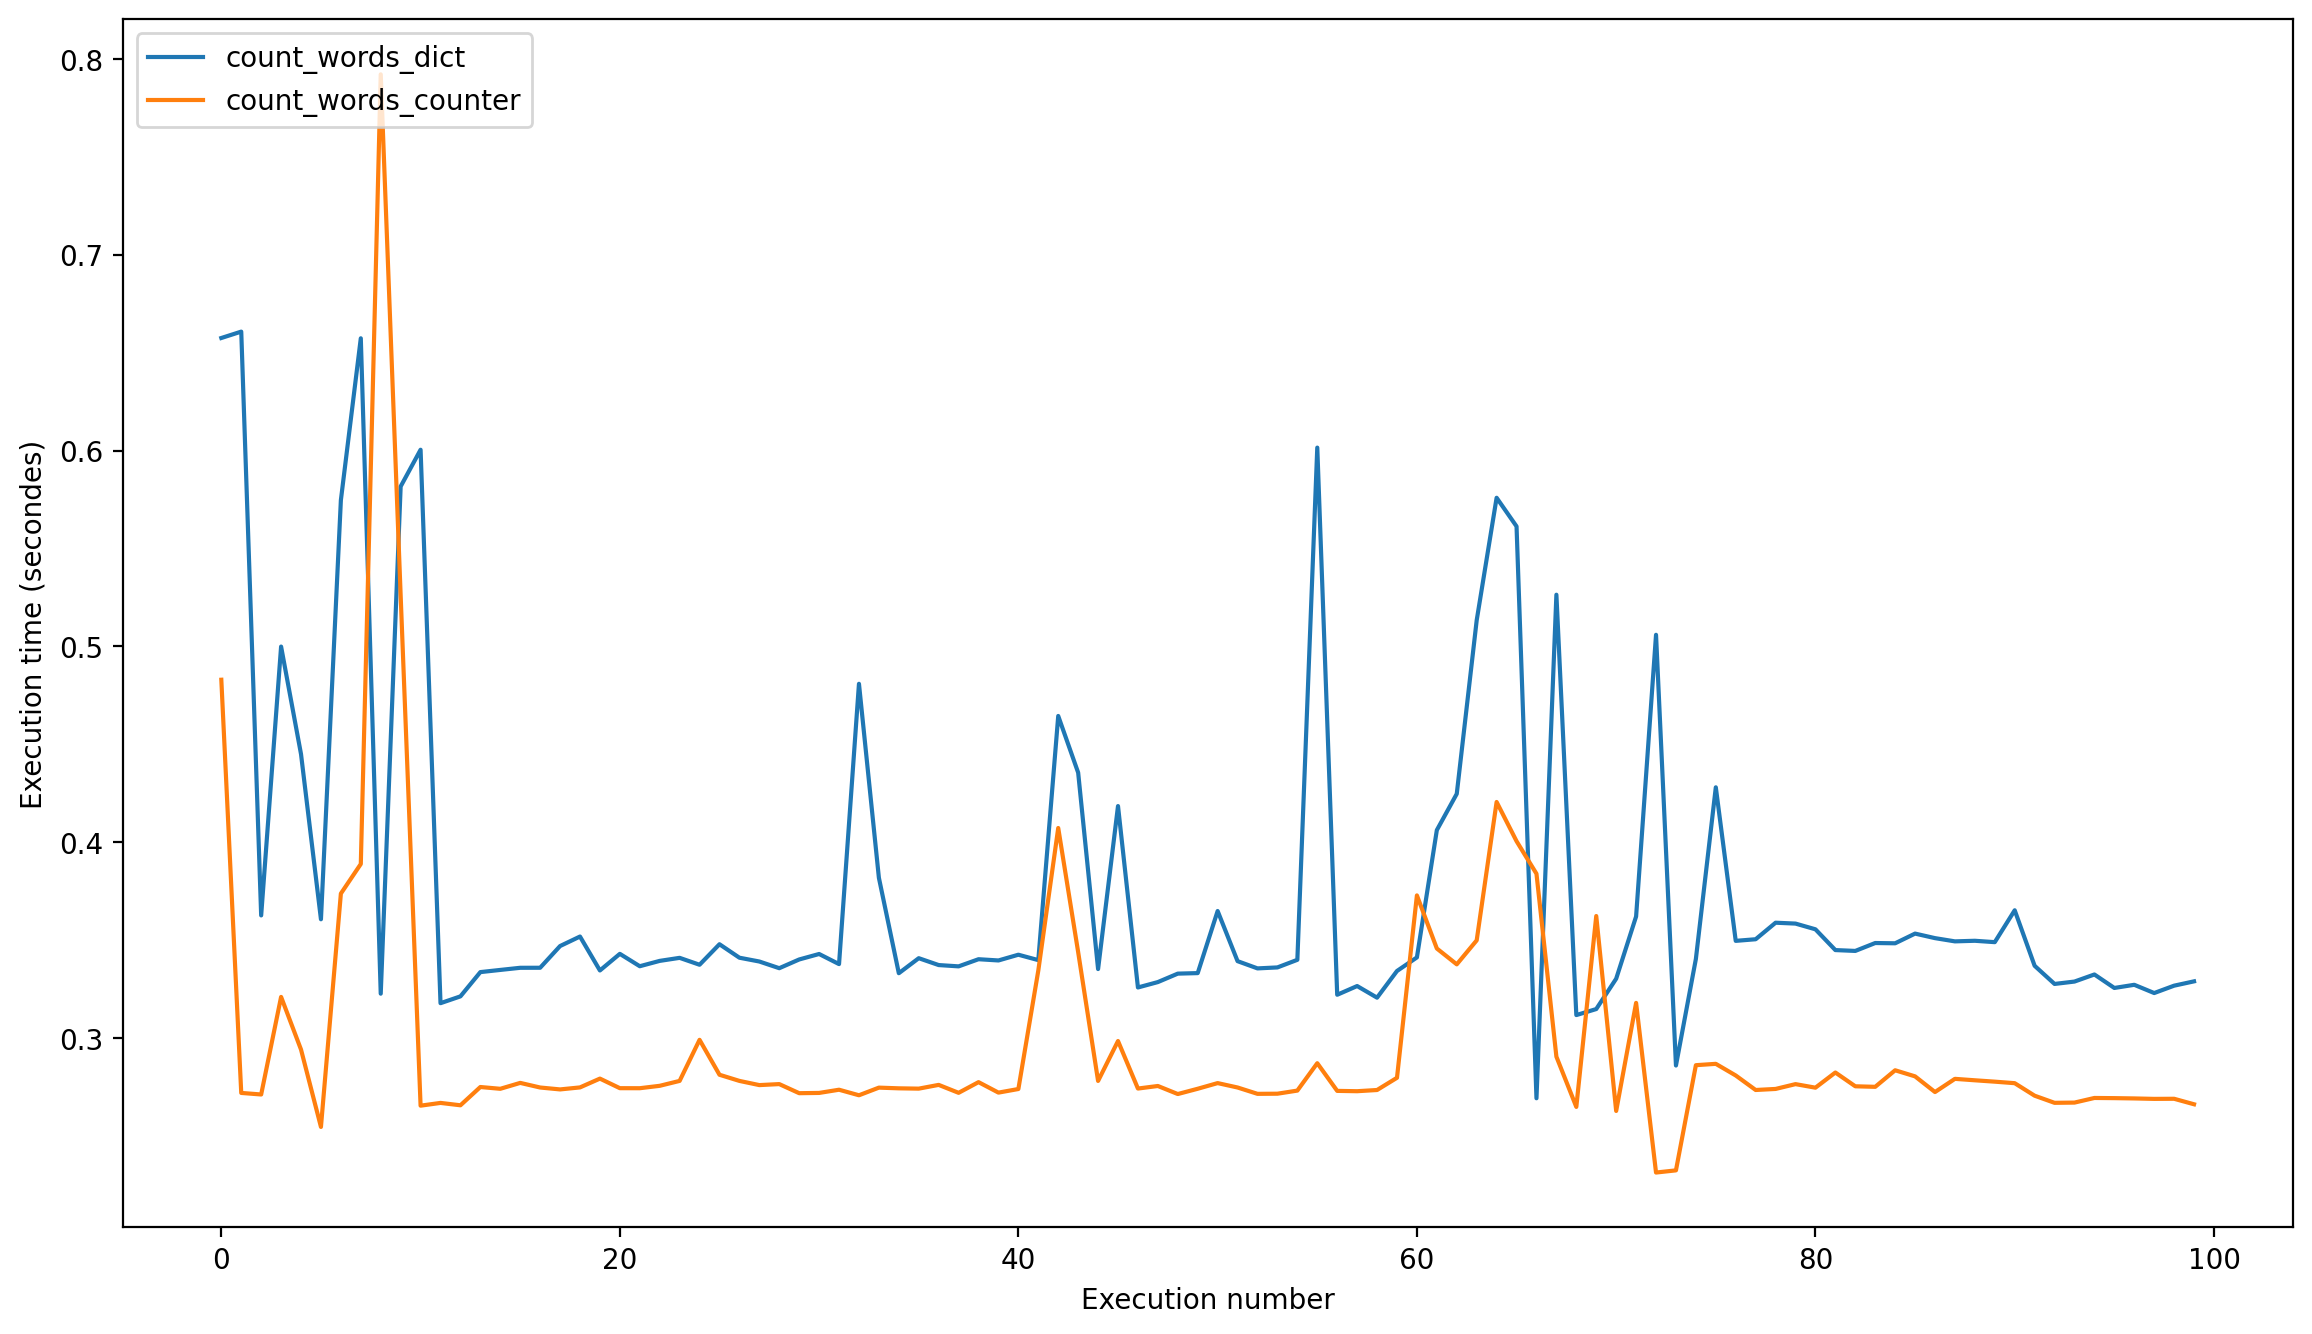

In [14]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure

plt.figure(figsize=(14, 8), dpi=200)

# On mesure le temps d'exécution des deux fonctions
dict_times, counter_times = measure_execution_time(filename, times = 100)

# On crée un graphique en lignes
plt.plot(range(len(dict_times)), dict_times, label='count_words_dict')
plt.plot(range(len(counter_times)), counter_times, label='count_words_counter')


# On ajoute une légende et des labels aux axes
plt.legend(loc='upper left')
plt.xlabel('Execution number')
plt.ylabel('Execution time (secondes)')

# On affiche le graphique
plt.show()

In [15]:
import numpy as np

print("Mean of dictionary" , np.mean(dict_times))
print("Mean of counter" , np.mean(counter_times))

Mean of dictionary 0.3772313255900003
Mean of counter 0.2974227637300001
